## Introduction

London is a very big and diverse city, and it is known for the pragmatic english way of living as well as for great tea and underground music.<br>
But no matter if they have left their partying 20s behing and look for something more in life, or if they have found their significant other and want to take a responsible next step, for many London habitants the question remains the same:<br><b>How about a pet?</b><br>
And by pet, in this case, we mean a dog. A loyal companion, that keeps you active and fit by talking long walks with you, loves you relentlessly as the leader of the pack and guards your apartment door.<br>
But wait… ist he place where you live the best place for a dog?<br>
This report will answer this question by building a modelt hat evaluates the different Neighbourhoods of London based on factors that would make the neighbourhood a good environment for a dog.<br>
The result will be usefull to anyone who wants to own a dog, and could also easily be used by anyone who wants to set up a pet store or veternarian clinic in London to see where a good spot is or where a lot ov competitors would await.

## Data

First, the relevant neighbourhoods will be scraped from the wikipedia page about Londons Boroughs.<br> 
Then, the location data containing Latitude and Longitude will be added.<br>
Next, the Foresquare API will be utilized to get location data concentrationg on the following factors:
-	Veterenarians, to provide quick medical care for the dog in case of emergencies
-	Parks, to take long walks and play fetch with the dog
-	Pet shops, to not be reliant on supermarkt pet food but to get good quality and toys nearby

The model will compare the neighbourhoods based on these factors, compare them to each other and in the end tell the future dog owner, where to best look for a new place before having their new animal friend move in.<br>

## Methodology

1. The different boroughs along with several informational data are scraped from a wikipedia page about the London Boroughs.<br><br>

2. The dataframe is cleaned and all information that is not interesting for this analysis is dropped.<br><br>

3. A csv file with the latitudes and longitudes of the boroughs is loaded into the notebook and merged with the first dataframe.<br><br>

4. Using Foursquare and the syntax oft he Forsquare API service, the function <b>getNearbyVenues</b> is created.<br> This function iterates through every borough and fetches the nearby venues in a 500 meter radius, based on categoryId provided. It puts the results into a pandas dataframe.<br><br>

5. This function can be used with the categoryIds of parks, veterenarians and petstores for each borough.<br> The dataframe for parks needs a bit more cleaning, since parks in the Foursquare category also include some subcategorys like business centers. So these columns get dropped.<br> To be able to analyze the data, we need the count of each venue for each borough. We accomplish this by grouping each dataframe by neighbourhood and counting ist size. Then we merge the dataframes together.<br><br>

6. Using Folium, we can now plot a map to get a first idea of the distribution of our relevant venues.<br><br>

7. To complete the dataframe, it gets merged with the previously scraped and cleaned data, and the NaN values get replaced by 0 to have a clean analysis.<br><br>

9. With the use of matplotlib, we plot a stacked bar chart displaying the boroughs and the three main criteria of the surrounding area, to get a good idea of which boroughs are the best for owning a dog.<br> The stacked bar plot is the best choice for this since it displays the spread of venues nicely in comparison for each neighbourhood.<br><br>

## Results

The result can be presented in two stages.<br><br>
The first stage is the plotted map, which displays the location of all boroughs with their parks (orange), veterenarians (blue) and petstores (green) set as colored circle markers.<br> This map gives a good general idea of the distribution of venues and can be attractive for anyone who wants to get a first impression when it comes to chosing the best borough for them and their beloved dog.<br> <br>
Boroughs without any markers will most likely immediately be dismissed and the map helps to narrow down the boroughs of interest, especially when it comes to deciding where in London the Neighbourhood should be located.<br> Anyone who prefers to live outside of the city can with the map choose to look at the Boroughs that are maybe not the overall best equipped one for a dog, but the best compromises given their location and the number of markers.<br> By clicking on a blue borough circle, the borough name pops up.

The second result to analyze is the stacked bar chart.<br> Based on the venue data retreived from Foursquare, the bar chart is a great way to see the distribution of venues for each borough. <br>In contrast to the map, not only does this bar chart display appearances of venues. <br>It also shows their relative occurence. With this, a compromise is possible when it comes to chosing the right borough, which is independent for each person that is looking to move to a dog-friendly neighbourhood.

The result obtained by the viewer of the bar charts depends on what preferences they have, and helps them to find the best solution and compromise.

## Discussion

Looking at the plotted map, it is noticable that some of the outer boroughs have no to almost no markers, which will most likely disqualify them.<br>
In contrast, the Boroughs in the center of town are very well equipped with venues of all kind on a much narrower space. <br>
So for anyone who would like to have a dog friendly apartment but stay in the inner city, the Neighbourhoods of Islington and Hackney are going into the second round of choice, since they have all the markers.<br>

Inner boroughs might be most suited for people that do not have a car and need to have all venues close by, in case they run out of dog food, want to take a walk or their dog needs medical care.<br> For dog owners that have a car though, some of the other boroughs might be more attractive. Southwark for example is a bit out of the inner city, but it has a lot of pet stores and there is a park too.<br> But no veterenarian in sight! So this might be more attractive for dog owners that don’t want to live in the inner city and have a car to get to a veterenarian if needed.

While the map is a great help for the location factor, the stacked bar chart gives much more clear insights about venue distribution and helps interested dog owners to analyze their preferred neighbourhoods.<br> As the bar chart shows, Islington is the borough with the hightest number of overall venues, ranking very high on Parks and Pet Stores, and average on Veterenarians.<br> It is followed by Hackney, which has just as much petstores and veterenarians but fewer parks. The bar chart provides a great quick overview of where there are all three venue categorys present and where not.<br> In fact, we can see that there are only five Boroughs that have all three venues within their reach. Interestingly, the Borough with the most veterenarians, Newham, has no petstores around, and only a small number of parks.<br> But if a dog is for example rather old, happy with a smaller number of parks and needs quick medical care more often than a young and healthy dog, then Newham can be just the right borough for the dog. 


## Conclusion 

This (geo) data based analysis of the boroughs of London gives us great insight into the distribution of venues that dog owners need across the british capital.<br> We can clearly see the best equipped borough (Islington) and the distribution across the other boroughs.<br> If one would want to take it one step further, more factors could be added to this analysis to build for example a borough search engine that can be filled with the parameters of e.g. the rent budget, a prioritized venue category, if a car is in use or not etc. <br>
Also, the engine, once it is built, could also be modified and used for other interested user cases, like senior citizens, people with children or special needs.

## Code

### First I import all the libraries that I will need for my research.

In [ ]:
# import pandas as pd
import numpy as np
import requests
import lxml.html as lh
from geopy.geocoders import Nominatim
!pip install folium
import folium
from pandas.io.json import json_normalize 

### Defining the url with the neighbourhoods of London and reading the wikitable data into a dataframe

In [2]:
url='https://en.wikipedia.org/wiki/List_of_London_boroughs'
df = pd.read_html(url, index_col=0, attrs={"class":"wikitable"})       

In [3]:
df = df[0].dropna(axis=0, thresh=4)

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12


### Dropping unnecessary columns

In [5]:
df_clean = df.drop(columns=[1, 2, 3, 5, 6, 8, 9])

In [6]:
df_clean.head()

,4,7
0,,
Borough,Political control,Population (2013 est)[1]
Barking and Dagenham [note 1],Labour,194352
Barnet,Conservative,369088
Bexley,Conservative,236687
Brent,Labour,317264


### Resetting the index and fixing column names

In [7]:
df_new = df_clean.reset_index()

In [8]:
df_new.head()

,0,4,7
0,Borough,Political control,Population (2013 est)[1]
1,Barking and Dagenham [note 1],Labour,194352
2,Barnet,Conservative,369088
3,Bexley,Conservative,236687
4,Brent,Labour,317264
5,Bromley,Conservative,317899
6,Camden,Labour,229719
7,Croydon,Labour,372752
8,Ealing,Labour,342494
9,Enfield,Labour,320524


In [9]:
df_renamed = df_new.rename({0: "Borough", 4: "Political Control", 7: "Population"}, axis=1)

In [10]:
df_renamed.drop([0], inplace=True)

In [11]:
df_renamed.head()

,Borough,Political Control,Population
1,Barking and Dagenham [note 1],Labour,194352
2,Barnet,Conservative,369088
3,Bexley,Conservative,236687
4,Brent,Labour,317264
5,Bromley,Conservative,317899
6,Camden,Labour,229719
7,Croydon,Labour,372752
8,Ealing,Labour,342494
9,Enfield,Labour,320524
10,Greenwich [note 2],Labour,264008


### Fixing the values of the columns that have extra information included

In [12]:
df_renamed.iloc[0]["Borough"] = "Barking and Dagenham"
df_renamed.iloc[9]["Borough"] = "Greenwich"
df_renamed.iloc[11]["Borough"] = "Hammersmith and Fulham"
df_renamed.iloc[14]["Political Control"] = "Conservative"

In [13]:
df_renamed.head()

,Borough,Political Control,Population
1,Barking and Dagenham,Labour,194352
2,Barnet,Conservative,369088
3,Bexley,Conservative,236687
4,Brent,Labour,317264
5,Bromley,Conservative,317899
6,Camden,Labour,229719
7,Croydon,Labour,372752
8,Ealing,Labour,342494
9,Enfield,Labour,320524
10,Greenwich,Labour,264008


### Importing a csv file with Latitudes and Longitudes of the Boroughs

In [14]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_c4e1a42e64954d46875805ee09bb7f8c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rtnRJNSAOtACupIHMQNR4xdrFWVLPwkzYnwZMJiQMK_M',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c4e1a42e64954d46875805ee09bb7f8c.get_object(Bucket='thebestclassification-donotdelete-pr-ghbxte1sk2oggu',Key='coord.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

coords = pd.read_csv(body)
coords.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.546483,0.129350
1,Barnet,51.625150,-0.152936
2,Bexley,51.439933,0.154327
3,Brent,51.567281,-0.271057
4,Bromley,51.406025,0.013156


### Merging the London Dataframe with the csv File containing location information

In [15]:
london = df_renamed.merge(coords, left_on='Borough', right_on='Borough')

In [16]:
london.head()

Index(['Borough', 'Political Control', 'Population', 'Latitude', 'Longitude'], dtype='object')

### Defining my Fourquare Credentials and Parameters

In [17]:
CLIENT_ID = '12YFPIWA3PDBL22NCCOYRGFZ4IFSQ0IHWJ3VDEPOMNRRDWIR' 
CLIENT_SECRET = 'AMMWYSSUBX0QQUASNPX2ZBWYL1SE0OSN5KQWLGBYDKDC2I3K'
VERSION = '20180605'
LIMIT = 100
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 12YFPIWA3PDBL22NCCOYRGFZ4IFSQ0IHWJ3VDEPOMNRRDWIR
CLIENT_SECRET:AMMWYSSUBX0QQUASNPX2ZBWYL1SE0OSN5KQWLGBYDKDC2I3K


### Setting the parameters and then defining a function called 'getNearbyVenues' to get the venues close to the boroughs based on categoryId

In [18]:
address = 'London'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [19]:
def getNearbyVenues(names, latitudes, longitudes, categoryId, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
    
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


### Executing the function to get nearby venues with each the Foursquare categoryId for veterenarians, parks and petstores

In [20]:
london_vets = getNearbyVenues(names=london['Borough'],
                                   latitudes=london['Latitude'],
                                   longitudes=london['Longitude'],
                                categoryId="4d954af4a243a5684765b473"
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [21]:
london_petstores = getNearbyVenues(names=london['Borough'],
                                   latitudes=london['Latitude'],
                                   longitudes=london['Longitude'],
                                categoryId="4bf58dd8d48988d100951735"
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [22]:
london_parks = getNearbyVenues(names=london['Borough'],
                                   latitudes=london['Latitude'],
                                   longitudes=london['Longitude'],
                                categoryId= "4bf58dd8d48988d163941735"
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


### Cleaning the dataframes and removing unwanted values

In [23]:
london_parks_clean = london_parks.rename(index=str, columns={"Venue Category": "Category"})
london_vets = london_vets.rename(index=str, columns={"Venue Category": "Category"})
london_petstores = london_petstores.rename(index=str, columns={"Venue Category": "Category"})


In [24]:
london_parks_clean = london_parks_clean[london_parks_clean.Category == "Park"]

### Grouping the dataframes to get the total count for venue category for each borough

In [25]:
allparks = london_parks_clean.groupby(['Neighborhood']).size().reset_index(name='Parks')
allvets = london_vets.groupby(['Neighborhood']).size().reset_index(name='Veterenarians')
allstores = london_petstores.groupby(['Neighborhood']).size().reset_index(name='Petstores')

### Combining the dataframes

In [26]:

london_stats = pd.concat([allparks.set_index('Neighborhood'),allvets.set_index('Neighborhood'),allstores.set_index('Neighborhood')], axis=1)


### Plotting a map of the boroguhs of london

In [27]:
map_london_dogs = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, label in zip(london['Latitude'], london['Longitude'], london['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=30,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,).add_to(map_london_dogs)  
    
map_london_dogs

### Plotting the map again but with the venue information included to display all venue types for each borough

In [28]:
map_london_dogs = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, label in zip(london['Latitude'], london['Longitude'], london['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=30,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,).add_to(map_london_dogs)  

for lat, lng, label in zip(london_vets['Venue Latitude'], london_vets['Venue Longitude'], london_vets['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,).add_to(map_london_dogs)  
    
for lat, lng, label in zip(london_petstores['Venue Latitude'], london_petstores['Venue Longitude'], london_petstores['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,).add_to(map_london_dogs)  

for lat, lng, label in zip(london_parks_clean['Venue Latitude'], london_parks_clean['Venue Longitude'], london_parks_clean['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,).add_to(map_london_dogs)  
    
map_london_dogs

### Merging together all statistical data and the borough dataframe to get a dataframe with all the information in one

In [29]:
london_stats.reset_index(level=0,inplace=True)

In [30]:
london_stats = london_stats.rename(index=str, columns={"index": "Borough"})


In [31]:
london_all = london.merge(london_stats, left_on='Borough', right_on='Borough')
london_all.fillna(0)

,Borough,Political Control,Population,Latitude,Longitude,Parks,Veterenarians,Petstores
0,Barking and Dagenham,Labour,194352,51.546483,0.129350,1.0,0.0,0.0
1,Bromley,Conservative,317899,51.406025,0.013156,3.0,0.0,1.0
2,Camden,Labour,229719,51.551706,-0.158826,1.0,0.0,2.0
3,Croydon,Labour,372752,51.376165,-0.098234,1.0,0.0,2.0
4,Ealing,Labour,342494,51.513295,-0.304331,2.0,1.0,1.0
5,Enfield,Labour,320524,51.652299,-0.080712,1.0,0.0,0.0
6,Greenwich,Labour,264008,51.482577,-0.007659,3.0,0.0,0.0
7,Hackney,Labour,257379,51.544205,-0.054215,2.0,1.0,4.0
8,Haringey,Labour,263386,51.590611,-0.110971,0.0,0.0,1.0
9,Havering,Conservative,242080,51.577924,0.212083,1.0,0.0,0.0


### Plotting a bar chart to see the ratio of venues in each category per borough

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


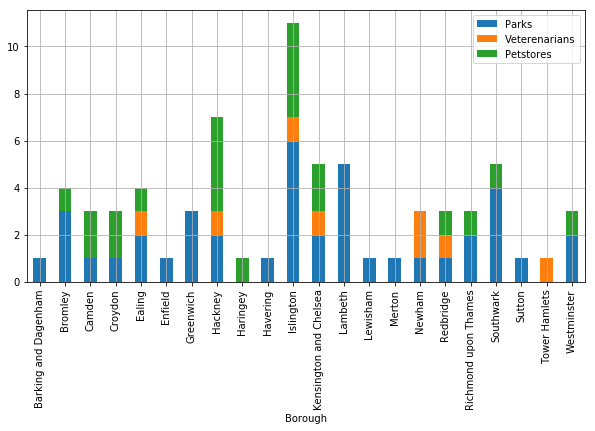

In [33]:
london_all.plot.bar(stacked=True, x='Borough', y=['Parks', 'Veterenarians', 'Petstores'], figsize=(10,5), grid=True)
